# b) Resuelva el problema mediante el metodo gráfico. Identifique (i) la región factible del problema, (ii) las restricciones, y (iii) el vértice y la curva de nivel de la función objetivo para la cual se alcanza la solución óptima (ayuda: cree un script en GNU Octave).

In [1]:
clear % eliminamos todas las variables creadas previamente en Octave/Matlab

## i) Variables de decisión: 

$x_1$: Unidades de panqueques producidos <br /> 
$x_2$: Gramos de queque producidos

## ii) Restricciones

### Disponibilidad de Harina

In [2]:
function x2 = harina(x1)
    
    %Aplicamos un truco para evitar despejar ecuaciones a mano. Considere una ecuación del tipo: a1*x1+a2*x2 = c
    a1 = 2/40;
    a2 = 2/500;
    c = 10;
    x2 = (c-a1*x1)/a2;
    
end

### Disponibilidad de huevos

In [3]:
function x2 = huevos(x1)

    a1 = 3/40;
    a2 = 3/500;
    c = 12;
    x2 = (c-a1*x1)/a2;
    
end

### Disponibilidad de leche

In [4]:
function x2 = leche(x1)
    
    a1 = 4/40;
    a2 = 1/500;
    c = 8;
    x2 = (c-a1*x1)/a2;
    
end

### Disponibilidad de azucar

In [5]:
function x2 = azucar(x1)
    
    a1 = 0.5/40;
    a2 = 0.5/500;
    c = 6;
    x2 = (c-a1*x1)/a2;
    
end

### Disponibilidad de mantequilla

In [6]:
function x2 = mantequilla(x1)
    
    a1 = 125/40;
    a2 = 250/500;
    c = 750;
    x2 = (c-a1*x1)/a2;
    
end

### Gráfico restricciones

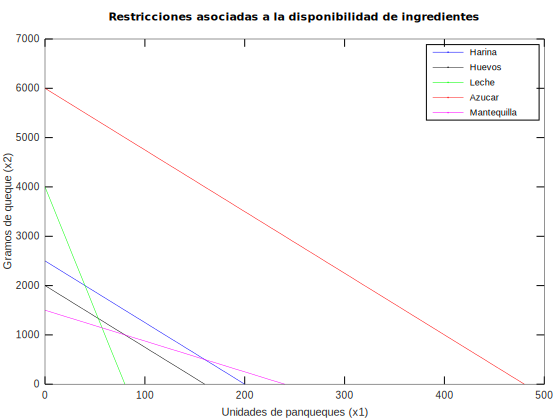

In [7]:
x1 = linspace(0,700); %Rango de valores de input de las funciones

plot(x1,harina(x1),'b') %color azul para disponibilidad de harina
hold on
plot(x1,huevos(x1),'k') %color negro para disponibilidad de huevos
hold on
plot(x1,leche(x1),'g') %color verde para disponibilidad de leche
hold on
plot(x1,azucar(x1),'r') %color rojo para disponibilidad de azucar
hold on
plot(x1,mantequilla(x1),'m') %color morado para disponibilidad de mantequilla
title ('Restricciones asociadas a la disponibilidad de ingredientes')
xlabel ('Unidades de panqueques (x1)')
ylabel ('Gramos de queque (x2)')
ylim([0 7000])
xlim([0 500])
legend('Harina','Huevos', 'Leche', 'Azucar', 'Mantequilla') %Legenda del grafico
hold off

### iii) Región factible

* Los vértices de la región factible son 4 y corresponden a intersecciones entre distintos pares de restricciones (incluidas las de no negatividad). 
* El primer vértice es el origen (0,0) que denominaremos 'v1'. Los vertices 'v2','v3','v4', son definidos según el sentido del reloj. 

#### Vértices

In [8]:
v1 =  [0,0]

v1 =

   0   0



In [9]:
v2 = [0,mantequilla(x1 = 0)] % intersección restricción de mantequilla con eje vertical

v2 =

      0   1500



In [10]:
v3 = (inv([125/40 250/500; 4/40 1/500])*[750;8])' % Interseccion restricciones de mantequilla y leche

v3 =

     57.143   1142.857



In [11]:
v4 = (inv([4/40 1/500;0 1])*[8;0])' % intersección restricción de leche con eje horizontal

v4 =

   80    0



#### Creamos una matriz de dos columnas con las coordenadas x e y de los vertices

In [12]:
v = [v1;v2;v3;v4]

v =

      0.00000      0.00000
      0.00000   1500.00000
     57.14286   1142.85714
     80.00000      0.00000



#### Gráfico

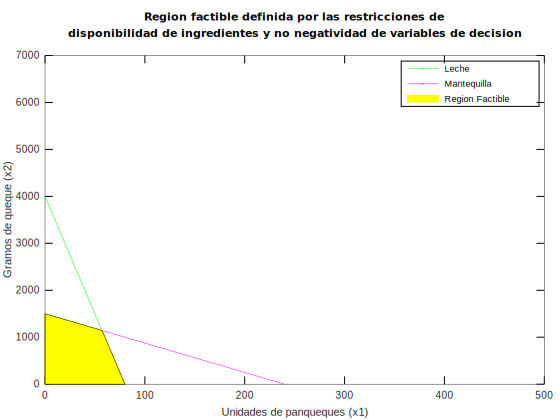

In [13]:
%Solo graficamos restricciones que definen espacio factible (asociadas a mantequilla y leche)

x1 = linspace(0,700); %Rango de valores de input para las funciones

plot(x1,leche(x1),'g') %color verde para disponibilidad de leche
hold on
plot(x1,mantequilla(x1),'m') %color morado para disponibilidad de mantequilla
fill(v(:,1),v(:,2),'y') % color amarillo para region factible
title ({'Region factible definida por las restricciones de' 'disponibilidad de ingredientes y no negatividad de variables de decision'})
xlabel ('Unidades de panqueques (x1)')
ylabel ('Gramos de queque (x2)')
ylim([0 7000])
xlim([0 500])
legend('Leche','Mantequilla','Region Factible') %Legenda del grafico
hold off

### iv) Solución óptima

#### Curva de nivel función objetivo

In [14]:
function x2 = curvadenivel(z,x1)
    
    #Aplicamos nuevamente truco para evitar error en despeje algebraico: z = c1*x1 + c2*x2 -> x2 = (z-c1*x1)/c2 
    c1 = 60;
    c2 = 5;
    x2 = (z-c1*x1)/c2;
    
end

In [15]:
function z = funcionobjetivo(x1,x2)

    z = 60*x1+5*x2;

end


In [16]:
funcionobjetivo(v2(1),v2(2))

ans =  7500


In [17]:
funcionobjetivo(v3(1),v3(2))

ans =  9142.9


In [18]:
funcionobjetivo(v4(1),v4(2))

ans =  4800


#### Gráfico de las curvas de nivel en los vértices

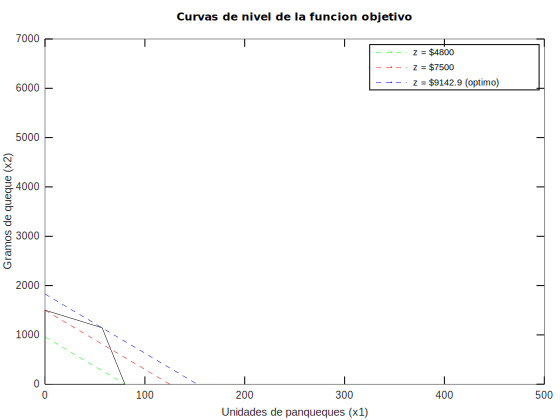

In [19]:
x1 = linspace(0,700); %Rango de valores de input para las funciones


fill(v(:,1),v(:,2),'w','EdgeColor','k')
hold on
c1 = plot(x1,curvadenivel(funcionobjetivo(v4(1),v4(2)),x1),'--g'); %Curva de nivel en el vértice 4 (FO: $4800)
hold on
c2 = plot(x1,curvadenivel(funcionobjetivo(v2(1),v2(2)),x1),'--r'); %Curva de nivel en el vertice 2 (FO: $7500)
hold on
c3 = plot(x1,curvadenivel(funcionobjetivo(v3(1),v3(2)),x1),'--b'); %Curva de nivel en el vértice 3 (FO: $9142.9)
hold on
title ('Curvas de nivel de la funcion objetivo')
xlabel ('Unidades de panqueques (x1)')
ylabel ('Gramos de queque (x2)')
ylim([0 7000])
xlim([0 500])
legend([c1 c2 c3], 'z = $4800','z = $7500','z = $9142.9 (optimo)')
hold off

#### Valor optimo

In [20]:
vopt = v3 #Variables de decisión en vértice óptimo (v3)

vopt =

     57.143   1142.857



In [21]:
FOopt = funcionobjetivo(vopt(1),vopt(2)) #Utilidad óptima en vértice óptimo (v3)

FOopt =  9142.9


# c) Verifique el valor óptimo identificado en la parte de anterior utilizado el Solver de Microsoft Excel y de GNU Octave.

## Matriz de restricciones

In [22]:
A=[2/40 2/500; 3/40 3/500;4/40 1/500;0.5/40 0.5/500; 125/40 250/500]

A =

   0.0500000   0.0040000
   0.0750000   0.0060000
   0.1000000   0.0020000
   0.0125000   0.0010000
   3.1250000   0.5000000



## Lado derecho restricciones 

In [23]:
b=[10 12 8 6 750]

b =

    10    12     8     6   750



## Ponderadores función objetivo

In [24]:
c=[60 5]

c =

   60    5



## Parámetros del optimizador

In [25]:
lb=[0,0];
ub=[];
ctype='UUUUU';
vtype='CC';
param.msglev=2;

## Optimización

### Solución óptima continua

In [26]:
glpk(c, A, b, lb, ub,ctype,vtype,s=-1,param)

*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   9.142857143e+03 inf =   0.000e+00 (0)
ans =

     57.143
   1142.857



* Función objetivo: $\$9143$  <br />
* Variables de decisión: $x_1 = 57.143$, $x_2 = 1142.857$  <br />
* Así verificamos que la solución coincide con la encontrada por medio del método gráfico

### Solución óptima entera

In [27]:
vtype='II';
glpk(c, A, b, lb, ub,ctype,vtype,s=-1,param)

*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     3: obj =   9.142857143e+03 inf =   0.000e+00 (0)
Long-step dual simplex will be used
+     3: mip =     not found yet <=              +inf        (1; 0)
#     3: obj =   9.142857143e+03 inf =   0.000e+00 (0)
Solution found by heuristic: 9135
+     3: mip =   9.135000000e+03 <=     tree is empty   0.0% (0; 1)
ans =

     57
   1143



* Función objetivo: $\$9135$  <br />
* Variables de decisión: $x_1 = 57$, $x_2 = 1143$